In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('click_stream.csv')

# CLEANING DATA 

### DATASET CLICK STREAM

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [10]:
df.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [18]:
df.shape

(12833602, 6)

In [19]:
df.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [22]:
df.sample(10)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
3000496,7835aed5-63db-4b80-bdf3-64026c8bb558,SEARCH,2019-01-27T20:29:18.635006Z,af6e4792-77a2-4f15-abb4-f36ea7f81b83,MOBILE,{'search_keywords': 'Dress Pesta'}
10363029,1505c345-023f-47de-8c39-5b84bc45f119,CLICK,2021-09-22T15:07:23.729600Z,c0ccc7ec-2f02-40c0-b8b0-4742a62949d2,MOBILE,NaN
10306011,732f697f-1f1a-4b3e-8f04-1e55b0be8311,ADD_TO_CART,2021-12-18T19:11:25.970149Z,f63ce54c-1f2b-49e0-8317-51992b0510a5,MOBILE,"{'product_id': 22101, 'quantity': 1, 'item_pri..."
10796930,d57aae0b-839c-4f56-9674-ba94d750b6b4,HOMEPAGE,2017-07-06T08:25:30.280649Z,89572990-150c-4c53-b5de-bb0990288ea1,MOBILE,NaN
3997765,75650777-b7ec-4596-93ab-37ae18f8be15,ITEM_DETAIL,2019-10-19T01:17:30.579662Z,00ad8c2f-50ca-4dfc-ad9d-c010c488c0d9,MOBILE,NaN
6024011,259eba80-04d5-4052-80de-d752a848d1f3,SEARCH,2020-01-31T12:22:59.287053Z,407c005a-1ecb-4456-96c4-91fc446e7c0b,WEB,{'search_keywords': 'Dress Kondangan'}
7901771,acf076e2-1341-4872-8f53-9106fe86cdd9,PROMO_PAGE,2020-01-29T20:25:00.387781Z,614b4613-74b1-4927-b389-abee2aba116d,MOBILE,NaN
2724431,0f5b6ee6-a33a-4e5d-9e09-df6e52c7252e,ADD_PROMO,2022-01-13T08:55:52.452764Z,48b7fdfd-8f8f-4882-a8f2-7462e6f43204,MOBILE,"{'promo_code': 'BUYMORE', 'promo_amount': 6276}"
2666796,5e8e1238-e8a9-4a88-8c27-fee16857aa48,SEARCH,2020-03-08T04:18:14.006562Z,62e3feb3-8616-47ae-8e10-7732661132d3,MOBILE,{'search_keywords': 'Dress Pesta'}
4259653,8ad788af-3fea-4775-91a1-3c97d9420846,ADD_TO_CART,2018-06-20T17:08:41.724868Z,92233386-b2ee-4ec2-a9a0-93b14f61e63a,MOBILE,"{'product_id': 29559, 'quantity': 1, 'item_pri..."


In [24]:
df.isna().sum()

session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    8544062
dtype: int64

In [25]:
#mengubah tipe data yang tidak sesuai
df['event_time'] = pd.to_datetime(df['event_time'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype              
---  ------          -----              
 0   session_id      object             
 1   event_name      object             
 2   event_time      datetime64[ns, UTC]
 3   event_id        object             
 4   traffic_source  object             
 5   event_metadata  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 587.5+ MB


In [36]:
#menampilkan waktu pengaksesan yang dilakukan customer 
#zona waktu ini +00 bukan zona waktu indonesia, apakah diconvert atau bagaimana?
df['event_time'].describe(datetime_is_numeric=True)

count                               12833602
mean     2020-10-17 06:11:58.513397504+00:00
min         2016-06-30 22:59:36.254358+00:00
25%      2019-11-18 01:19:53.345473536+00:00
50%      2021-02-15 16:41:10.214701568+00:00
75%      2021-12-14 17:11:39.159275520+00:00
max         2022-08-01 00:49:59.408424+00:00
Name: event_time, dtype: object

In [41]:
#menampilkan waktu minimum dan maksimum pengaksesan oleh customer
print(df.event_time.min())
print(df.event_time.max())

2016-06-30 22:59:36.254358
2022-08-01 00:49:59.408424


In [42]:
df.event_time.sort_values(ascending=False).head(20)

12803759   2022-08-01 00:49:59.408424
12803758   2022-08-01 00:39:39.408424
10061205   2022-08-01 00:31:53.957678
12803757   2022-08-01 00:29:20.408424
4959631    2022-08-01 00:24:28.200546
11980458   2022-08-01 00:23:04.821469
10838163   2022-08-01 00:19:03.292816
12803756   2022-08-01 00:18:46.408424
12729427   2022-08-01 00:18:12.385394
12400678   2022-08-01 00:14:36.582104
10838162   2022-08-01 00:13:06.292816
11463233   2022-08-01 00:12:17.334112
12400677   2022-08-01 00:11:45.582104
8245485    2022-08-01 00:11:05.983028
12803755   2022-08-01 00:09:23.408424
12400676   2022-08-01 00:08:59.582104
3908489    2022-08-01 00:08:19.147050
10838161   2022-08-01 00:07:44.292816
12400675   2022-08-01 00:05:55.582104
3908488    2022-08-01 00:04:47.147050
Name: event_time, dtype: datetime64[ns]

In [43]:
df.event_time.sort_values(ascending=True).head(20)

12371556   2016-06-30 22:59:36.254358
12371559   2016-06-30 23:01:06.254358
12371557   2016-06-30 23:01:14.254358
12371560   2016-06-30 23:02:35.254358
12371561   2016-06-30 23:03:56.254358
12371562   2016-06-30 23:05:40.254358
12371563   2016-06-30 23:06:55.254358
12371564   2016-06-30 23:08:24.254358
12371565   2016-06-30 23:10:00.254358
12371566   2016-06-30 23:11:11.254358
12371567   2016-06-30 23:12:46.254358
12371568   2016-06-30 23:14:11.254358
12371569   2016-06-30 23:15:28.254358
12371558   2016-06-30 23:18:44.792905
5004534    2016-07-01 02:12:39.860873
5004535    2016-07-01 02:19:09.860873
5004539    2016-07-01 02:19:26.860873
5004536    2016-07-01 02:26:03.860873
5004540    2016-07-01 02:26:04.860873
5004537    2016-07-01 02:33:18.860873
Name: event_time, dtype: datetime64[ns]

In [54]:
# mengecek apakah ada outlier didalam event_name
df.event_name.unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [63]:
#mengecek promo yang digunakan oleh customer
Promo = df.loc[df['event_name']=='ADD_PROMO']


,session_id,event_name,event_time,event_id,traffic_source,event_metadata
20,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_PROMO,2019-09-09 07:22:05.425431,28329764-aa29-4e7a-9d8e-eee88d00a640,MOBILE,"{'promo_code': 'AZ2022', 'promo_amount': 7047}"
46,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,ADD_PROMO,2019-09-24 16:16:10.425431,7a808081-2384-4a3a-ad00-9f10df4f07a7,WEB,"{'promo_code': 'BUYMORE', 'promo_amount': 4903}"
53,98e66f53-f24f-4238-8c9c-34a0482e22d5,ADD_PROMO,2019-10-02 15:14:18.425431,1d293181-b1cf-46e0-b5eb-682fe652131d,MOBILE,"{'promo_code': 'AZ2022', 'promo_amount': 6307}"
74,1553b735-081d-4dc5-8d5f-80c1bf442e0f,ADD_PROMO,2019-10-16 20:20:14.425431,c86b2a91-0a21-404a-98e9-947d3060fdc2,MOBILE,"{'promo_code': 'WEEKENDSERU', 'promo_amount': ..."
169,a1027501-f085-479f-a719-1aeec041408c,ADD_PROMO,2019-11-20 03:28:12.425431,cef2a298-e38b-4460-bc89-71f7a3039ff7,MOBILE,"{'promo_code': 'XX2022', 'promo_amount': 2569}"
...,...,...,...,...,...,...
12832905,cebfe9cd-0754-4151-9ba7-2372164686b7,ADD_PROMO,2020-04-05 10:24:17.116768,a5ecd91b-ed11-4c8b-adf7-bab2720bc3c6,MOBILE,"{'promo_code': 'WEEKENDMANTAP', 'promo_amount'..."
12832915,5e7c20e3-e1f0-42ae-9016-b3227169dea9,ADD_PROMO,2018-06-03 08:00:35.938975,487307cd-222a-4131-bc6a-69effe9f6560,MOBILE,"{'promo_code': 'WEEKENDSERU', 'promo_amount': ..."
12832967,eef8cec1-9dc6-4756-a4bc-0832da4b6e69,ADD_PROMO,2021-07-25 08:23:48.795552,7fd98dbb-ed1a-4a5e-998f-d09566a67de0,MOBILE,"{'promo_code': 'LIBURDONG', 'promo_amount': 3204}"
12833104,137b5f97-a8d0-4898-ac99-12cbbfc52362,ADD_PROMO,2021-11-18 17:57:33.345950,9abcf7c9-41e3-497e-974f-174a27161d2b,MOBILE,"{'promo_code': 'AZ2022', 'promo_amount': 5284}"


In [79]:
df['event_metadata'].describe()

count                           4289540
unique                          2006748
top       {'payment_status': 'Success'}
freq                             815962
Name: event_metadata, dtype: object

In [94]:
#mengecek pencarian yang dilakukan oleh customer
search = df.loc[df['event_name']=='SEARCH']
search

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
5,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01 12:07:00.322763,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'}
22,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09 05:06:26.425431,65ad97d0-9207-447e-b09d-fcc00a569824,MOBILE,{'search_keywords': 'Tas Wanita'}
35,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09 08:50:27.425431,a2e93548-18b5-4a79-b74f-42bbc0cf0fbd,MOBILE,{'search_keywords': 'Celana Panjang'}
57,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02 17:17:08.425431,bf6963cd-b681-4763-b796-ce18d3b9004f,MOBILE,{'search_keywords': 'Kaos'}
59,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02 21:07:33.425431,cf5d38ae-7f44-4166-9cf9-c43fb57b8f3a,MOBILE,{'search_keywords': 'Sepatu'}
...,...,...,...,...,...,...
12833585,f38416ce-51f2-46b0-a476-776d8fed1cb0,SEARCH,2021-08-01 08:03:07.737783,4e527503-27e3-4cbc-8964-23896c34fa96,WEB,{'search_keywords': 'Sepatu Adidas'}
12833589,c1ce86f6-858b-4009-af5b-f1483a28d020,SEARCH,2020-09-22 22:44:59.674560,cbc4e8e5-aa48-40c6-8e69-07382e1d35bc,WEB,{'search_keywords': 'Barang Bekas'}
12833593,f5c4bbe0-f977-45bb-af23-6ab524df7777,SEARCH,2022-04-09 21:01:31.132472,086302b8-62ba-4ce6-8cdc-9924c92176fc,MOBILE,{'search_keywords': 'Baju'}
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07 04:37:53.354381,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,{'search_keywords': 'Bekas'}


In [80]:
df['event_name'].describe()

count     12833602
unique           9
top          CLICK
freq       2498038
Name: event_name, dtype: object

In [83]:
#menampilkan jenis perangkat pengaksesan yang digunakan oleh customer
df.traffic_source.unique()

array(['MOBILE', 'WEB'], dtype=object)

# Noted

1. Terdapat zona waktu +00 bukan wilayah Indonesia apakah perlu di convert?
2. Customer mengakses menggunakan mobile dan web
3. waktu pengaksesan customer dimulai pada tanggal 2016-06-30 22:59:36 dan pengaksesan terakhir pada tanggal 2022-08-01 00:49:59

# Exploratory Data Analysis

Dalam mengakses aplikasi jenis apa yang digunakan oleh customer?

In [51]:
traffic_src = df.groupby('traffic_source')[['event_id']].count()
traffic_src

,event_id
traffic_source,
MOBILE,11548304
WEB,1285298


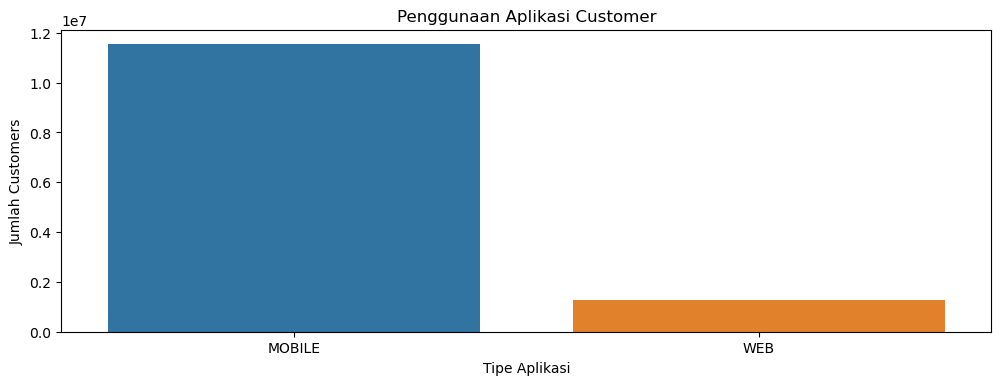

In [100]:
plt.figure(figsize=(12,4), dpi=100)
sns.barplot(x=traffic_src.index, y=traffic_src.event_id)
plt.xlabel("Tipe Aplikasi")
plt.ylabel("Jumlah Customers")
plt.title("Penggunaan Aplikasi Customer");

Terdapat 11.548.304 customer mengakses aplikasi menggunakan mobile, dan sebanyak 1.285.298 customer mengakses aplikasi menggunakan web

In [81]:
#Mengecek aktivitas yang dilakukan customer saat mengakses aplikasi
customer_click = df.groupby('event_name')[['event_metadata']].count()
customer_click

,event_metadata
event_name,
ADD_PROMO,326535
ADD_TO_CART,1937157
BOOKING,852582
CLICK,0
HOMEPAGE,0
ITEM_DETAIL,0
PROMO_PAGE,0
SCROLL,0
SEARCH,1173266


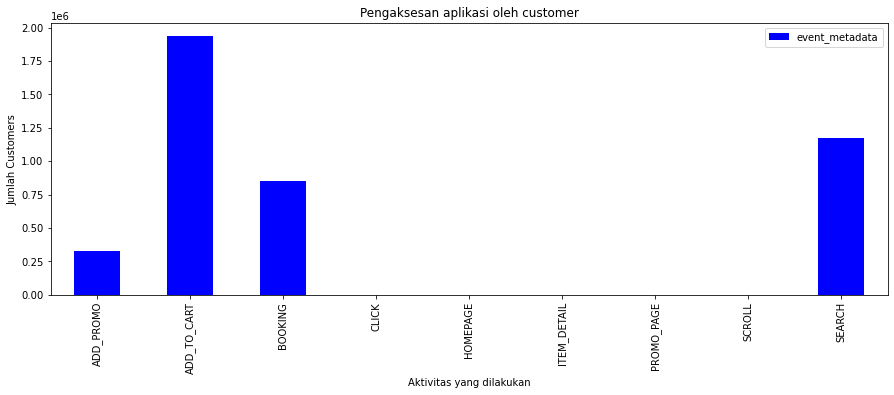

In [91]:
customer_click.plot(kind="bar", color = "blue", figsize=(15,5))
plt.xlabel("Aktivitas yang dilakukan")
plt.ylabel("Jumlah Customers")
plt.title("Pengaksesan aplikasi oleh customer")
plt.show()

Customer yang menggunakan promo sebanyak 326.535 customer, customer yang menambahkan produk kedalam keranjang sebanyak 1.937.157 customer, kemudian terdapat 852.582 customer, dan terdapat sebanyak 1.173.266 yang melakukan pencarian terhadap produk-produk. 